In [1]:
pip install torch torchvision numpy matplotlib scikit-image

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [2]:
class Generator(nn.Module):
    def __init__(self, latent_dim, img_channels):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, img_channels * 28 * 28),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(img.size(0), img_channels, 28, 28)


In [3]:
class Discriminator(nn.Module):
    def __init__(self, img_channels):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(img_channels * 28 * 28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)


In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (resize and normalize)
transform = transforms.Compose([
    transforms.Grayscale(),                 # Ensure grayscale format
    transforms.Resize((28, 28)),           # Resize to a manageable resolution
    transforms.ToTensor(),                   # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

# Load train, validation, and test datasets
train_dataset = datasets.ImageFolder(root='D:/GAN project/chest_xray/chest_xray/train', transform=transform)
val_dataset = datasets.ImageFolder(root='D:/GAN project/chest_xray/chest_xray/val', transform=transform)
test_dataset = datasets.ImageFolder(root='D:/GAN project/chest_xray/chest_xray/test', transform=transform)

# Create DataLoader for each set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [5]:
epochs=100
latent_dim = 100
img_channels = 1

generator = Generator(latent_dim, img_channels)
discriminator = Discriminator(img_channels)

adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


[Epoch 1/100] [Batch 1/163] [D loss: 0.6964] [G loss: 0.6675]
[Epoch 1/100] [Batch 2/163] [D loss: 0.6649] [G loss: 0.6648]
[Epoch 1/100] [Batch 3/163] [D loss: 0.6377] [G loss: 0.6617]
[Epoch 1/100] [Batch 4/163] [D loss: 0.6035] [G loss: 0.6561]
[Epoch 1/100] [Batch 5/163] [D loss: 0.5683] [G loss: 0.6425]
[Epoch 1/100] [Batch 6/163] [D loss: 0.5438] [G loss: 0.6193]
[Epoch 1/100] [Batch 7/163] [D loss: 0.5398] [G loss: 0.5709]
[Epoch 1/100] [Batch 8/163] [D loss: 0.5478] [G loss: 0.5091]
[Epoch 1/100] [Batch 9/163] [D loss: 0.5892] [G loss: 0.4536]
[Epoch 1/100] [Batch 10/163] [D loss: 0.5893] [G loss: 0.4468]
[Epoch 1/100] [Batch 11/163] [D loss: 0.5761] [G loss: 0.4823]
[Epoch 1/100] [Batch 12/163] [D loss: 0.5536] [G loss: 0.5738]
[Epoch 1/100] [Batch 13/163] [D loss: 0.4999] [G loss: 0.7281]
[Epoch 1/100] [Batch 14/163] [D loss: 0.4954] [G loss: 0.8051]
[Epoch 1/100] [Batch 15/163] [D loss: 0.5274] [G loss: 0.7979]
[Epoch 1/100] [Batch 16/163] [D loss: 0.6407] [G loss: 0.7562]
[

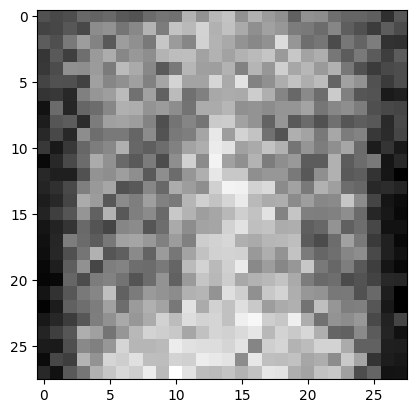

[Epoch 2/100] [Batch 1/163] [D loss: 0.2257] [G loss: 1.4456]
[Epoch 2/100] [Batch 2/163] [D loss: 0.1608] [G loss: 2.3265]
[Epoch 2/100] [Batch 3/163] [D loss: 0.1745] [G loss: 1.4593]
[Epoch 2/100] [Batch 4/163] [D loss: 0.1619] [G loss: 2.0565]
[Epoch 2/100] [Batch 5/163] [D loss: 0.2281] [G loss: 1.6479]
[Epoch 2/100] [Batch 6/163] [D loss: 0.2545] [G loss: 1.1512]
[Epoch 2/100] [Batch 7/163] [D loss: 0.2966] [G loss: 2.8362]
[Epoch 2/100] [Batch 8/163] [D loss: 0.5053] [G loss: 0.4899]
[Epoch 2/100] [Batch 9/163] [D loss: 0.5252] [G loss: 3.9173]
[Epoch 2/100] [Batch 10/163] [D loss: 0.1152] [G loss: 2.1226]
[Epoch 2/100] [Batch 11/163] [D loss: 0.4896] [G loss: 0.5039]
[Epoch 2/100] [Batch 12/163] [D loss: 0.2821] [G loss: 2.6743]
[Epoch 2/100] [Batch 13/163] [D loss: 0.2645] [G loss: 1.8705]
[Epoch 2/100] [Batch 14/163] [D loss: 0.5201] [G loss: 0.4821]
[Epoch 2/100] [Batch 15/163] [D loss: 0.2385] [G loss: 2.5870]
[Epoch 2/100] [Batch 16/163] [D loss: 0.1578] [G loss: 2.1231]
[

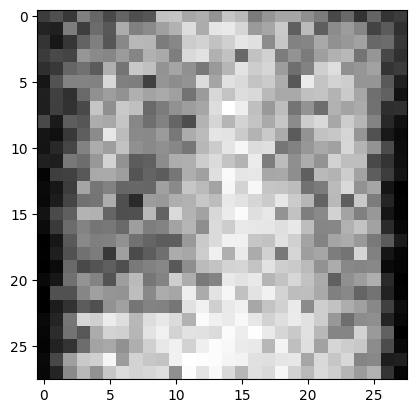

[Epoch 12/100] [Batch 1/163] [D loss: 0.3914] [G loss: 1.3612]
[Epoch 12/100] [Batch 2/163] [D loss: 0.3823] [G loss: 1.2828]
[Epoch 12/100] [Batch 3/163] [D loss: 0.3653] [G loss: 1.3199]
[Epoch 12/100] [Batch 4/163] [D loss: 0.2771] [G loss: 1.3500]
[Epoch 12/100] [Batch 5/163] [D loss: 0.4729] [G loss: 1.3440]
[Epoch 12/100] [Batch 6/163] [D loss: 0.3434] [G loss: 1.1939]
[Epoch 12/100] [Batch 7/163] [D loss: 0.3777] [G loss: 1.3888]
[Epoch 12/100] [Batch 8/163] [D loss: 0.4122] [G loss: 1.3786]
[Epoch 12/100] [Batch 9/163] [D loss: 0.4165] [G loss: 1.2065]
[Epoch 12/100] [Batch 10/163] [D loss: 0.5080] [G loss: 1.0800]
[Epoch 12/100] [Batch 11/163] [D loss: 0.3236] [G loss: 1.0601]
[Epoch 12/100] [Batch 12/163] [D loss: 0.3577] [G loss: 1.3471]
[Epoch 12/100] [Batch 13/163] [D loss: 0.2525] [G loss: 1.3425]
[Epoch 12/100] [Batch 14/163] [D loss: 0.3122] [G loss: 1.4030]
[Epoch 12/100] [Batch 15/163] [D loss: 0.3188] [G loss: 1.1390]
[Epoch 12/100] [Batch 16/163] [D loss: 0.3395] [G

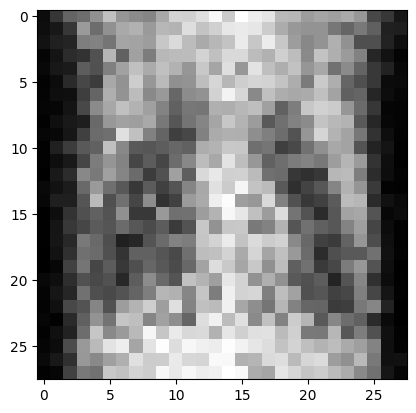

[Epoch 22/100] [Batch 1/163] [D loss: 0.3201] [G loss: 1.7456]
[Epoch 22/100] [Batch 2/163] [D loss: 0.3631] [G loss: 1.0476]
[Epoch 22/100] [Batch 3/163] [D loss: 0.3124] [G loss: 1.6811]
[Epoch 22/100] [Batch 4/163] [D loss: 0.2485] [G loss: 1.3742]
[Epoch 22/100] [Batch 5/163] [D loss: 0.2341] [G loss: 1.4697]
[Epoch 22/100] [Batch 6/163] [D loss: 0.2516] [G loss: 1.9435]
[Epoch 22/100] [Batch 7/163] [D loss: 0.2795] [G loss: 1.4685]
[Epoch 22/100] [Batch 8/163] [D loss: 0.2578] [G loss: 1.1386]
[Epoch 22/100] [Batch 9/163] [D loss: 0.2674] [G loss: 2.0445]
[Epoch 22/100] [Batch 10/163] [D loss: 0.2362] [G loss: 1.5998]
[Epoch 22/100] [Batch 11/163] [D loss: 0.2631] [G loss: 1.4780]
[Epoch 22/100] [Batch 12/163] [D loss: 0.3714] [G loss: 1.4809]
[Epoch 22/100] [Batch 13/163] [D loss: 0.3206] [G loss: 1.2437]
[Epoch 22/100] [Batch 14/163] [D loss: 0.3627] [G loss: 1.9062]
[Epoch 22/100] [Batch 15/163] [D loss: 0.3199] [G loss: 1.5499]
[Epoch 22/100] [Batch 16/163] [D loss: 0.3079] [G

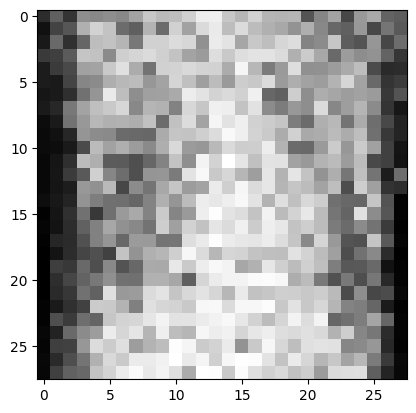

[Epoch 32/100] [Batch 1/163] [D loss: 0.4489] [G loss: 2.3677]
[Epoch 32/100] [Batch 2/163] [D loss: 0.3500] [G loss: 1.3645]
[Epoch 32/100] [Batch 3/163] [D loss: 0.3517] [G loss: 1.7459]
[Epoch 32/100] [Batch 4/163] [D loss: 0.4097] [G loss: 1.3912]
[Epoch 32/100] [Batch 5/163] [D loss: 0.3863] [G loss: 1.4578]
[Epoch 32/100] [Batch 6/163] [D loss: 0.3918] [G loss: 1.4752]
[Epoch 32/100] [Batch 7/163] [D loss: 0.4890] [G loss: 2.1685]
[Epoch 32/100] [Batch 8/163] [D loss: 0.8688] [G loss: 0.5543]
[Epoch 32/100] [Batch 9/163] [D loss: 0.7823] [G loss: 3.9349]
[Epoch 32/100] [Batch 10/163] [D loss: 0.2874] [G loss: 3.5832]
[Epoch 32/100] [Batch 11/163] [D loss: 0.4223] [G loss: 1.8431]
[Epoch 32/100] [Batch 12/163] [D loss: 0.2767] [G loss: 1.5218]
[Epoch 32/100] [Batch 13/163] [D loss: 0.3162] [G loss: 1.9222]
[Epoch 32/100] [Batch 14/163] [D loss: 0.3205] [G loss: 1.7980]
[Epoch 32/100] [Batch 15/163] [D loss: 0.4121] [G loss: 1.3636]
[Epoch 32/100] [Batch 16/163] [D loss: 0.3216] [G

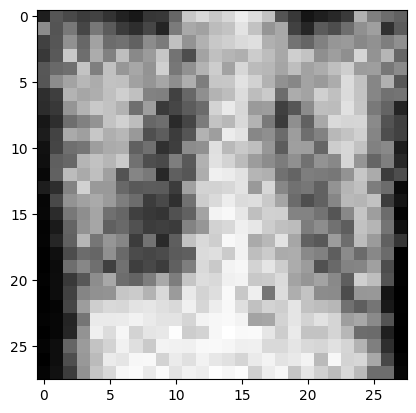

[Epoch 42/100] [Batch 1/163] [D loss: 0.7430] [G loss: 0.5125]
[Epoch 42/100] [Batch 2/163] [D loss: 0.6408] [G loss: 2.9345]
[Epoch 42/100] [Batch 3/163] [D loss: 0.5642] [G loss: 2.0188]
[Epoch 42/100] [Batch 4/163] [D loss: 0.8466] [G loss: 0.5743]
[Epoch 42/100] [Batch 5/163] [D loss: 0.5549] [G loss: 1.3395]
[Epoch 42/100] [Batch 6/163] [D loss: 0.5235] [G loss: 1.6652]
[Epoch 42/100] [Batch 7/163] [D loss: 0.3833] [G loss: 1.5851]
[Epoch 42/100] [Batch 8/163] [D loss: 0.5455] [G loss: 0.9905]
[Epoch 42/100] [Batch 9/163] [D loss: 0.4090] [G loss: 1.3146]
[Epoch 42/100] [Batch 10/163] [D loss: 0.3944] [G loss: 1.3667]
[Epoch 42/100] [Batch 11/163] [D loss: 0.5638] [G loss: 1.1944]
[Epoch 42/100] [Batch 12/163] [D loss: 0.4958] [G loss: 1.3166]
[Epoch 42/100] [Batch 13/163] [D loss: 0.5545] [G loss: 0.7301]
[Epoch 42/100] [Batch 14/163] [D loss: 0.5570] [G loss: 1.5843]
[Epoch 42/100] [Batch 15/163] [D loss: 0.5506] [G loss: 1.2946]
[Epoch 42/100] [Batch 16/163] [D loss: 0.4140] [G

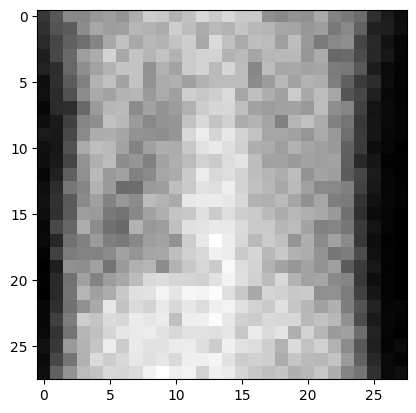

[Epoch 52/100] [Batch 1/163] [D loss: 0.5292] [G loss: 0.7836]
[Epoch 52/100] [Batch 2/163] [D loss: 0.5089] [G loss: 1.2618]
[Epoch 52/100] [Batch 3/163] [D loss: 0.4912] [G loss: 1.1118]
[Epoch 52/100] [Batch 4/163] [D loss: 0.4457] [G loss: 1.0197]
[Epoch 52/100] [Batch 5/163] [D loss: 0.5074] [G loss: 0.9580]
[Epoch 52/100] [Batch 6/163] [D loss: 0.4948] [G loss: 1.0820]
[Epoch 52/100] [Batch 7/163] [D loss: 0.4522] [G loss: 0.9443]
[Epoch 52/100] [Batch 8/163] [D loss: 0.5640] [G loss: 1.2672]
[Epoch 52/100] [Batch 9/163] [D loss: 0.4375] [G loss: 0.8781]
[Epoch 52/100] [Batch 10/163] [D loss: 0.4963] [G loss: 0.8943]
[Epoch 52/100] [Batch 11/163] [D loss: 0.4664] [G loss: 1.3752]
[Epoch 52/100] [Batch 12/163] [D loss: 0.4603] [G loss: 0.9132]
[Epoch 52/100] [Batch 13/163] [D loss: 0.5471] [G loss: 1.0058]
[Epoch 52/100] [Batch 14/163] [D loss: 0.5895] [G loss: 1.2081]
[Epoch 52/100] [Batch 15/163] [D loss: 0.5627] [G loss: 1.1271]
[Epoch 52/100] [Batch 16/163] [D loss: 0.5397] [G

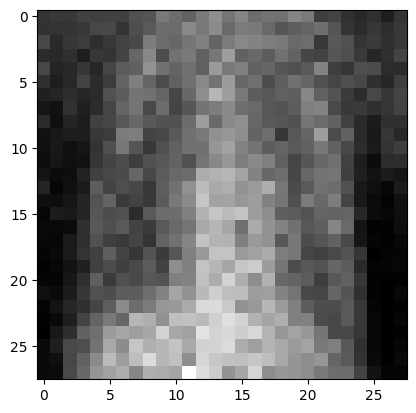

[Epoch 62/100] [Batch 1/163] [D loss: 0.5412] [G loss: 0.9727]
[Epoch 62/100] [Batch 2/163] [D loss: 0.5438] [G loss: 0.9659]
[Epoch 62/100] [Batch 3/163] [D loss: 0.5053] [G loss: 1.2767]
[Epoch 62/100] [Batch 4/163] [D loss: 0.4249] [G loss: 1.0589]
[Epoch 62/100] [Batch 5/163] [D loss: 0.5603] [G loss: 0.9027]
[Epoch 62/100] [Batch 6/163] [D loss: 0.4918] [G loss: 1.4281]
[Epoch 62/100] [Batch 7/163] [D loss: 0.5200] [G loss: 0.7450]
[Epoch 62/100] [Batch 8/163] [D loss: 0.5073] [G loss: 1.5719]
[Epoch 62/100] [Batch 9/163] [D loss: 0.4885] [G loss: 0.7997]
[Epoch 62/100] [Batch 10/163] [D loss: 0.4984] [G loss: 1.1040]
[Epoch 62/100] [Batch 11/163] [D loss: 0.6039] [G loss: 1.3853]
[Epoch 62/100] [Batch 12/163] [D loss: 0.5846] [G loss: 0.6113]
[Epoch 62/100] [Batch 13/163] [D loss: 0.7169] [G loss: 1.8424]
[Epoch 62/100] [Batch 14/163] [D loss: 0.6796] [G loss: 0.5797]
[Epoch 62/100] [Batch 15/163] [D loss: 0.6432] [G loss: 1.3313]
[Epoch 62/100] [Batch 16/163] [D loss: 0.5947] [G

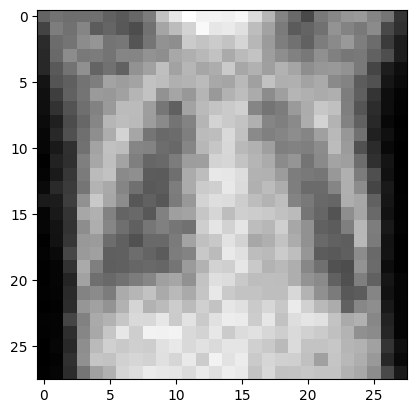

[Epoch 72/100] [Batch 1/163] [D loss: 0.5263] [G loss: 0.8298]
[Epoch 72/100] [Batch 2/163] [D loss: 0.6376] [G loss: 0.9870]
[Epoch 72/100] [Batch 3/163] [D loss: 0.5785] [G loss: 0.8306]
[Epoch 72/100] [Batch 4/163] [D loss: 0.5019] [G loss: 0.9877]
[Epoch 72/100] [Batch 5/163] [D loss: 0.5777] [G loss: 1.1645]
[Epoch 72/100] [Batch 6/163] [D loss: 0.5603] [G loss: 0.8955]
[Epoch 72/100] [Batch 7/163] [D loss: 0.5549] [G loss: 0.9969]
[Epoch 72/100] [Batch 8/163] [D loss: 0.5318] [G loss: 1.1987]
[Epoch 72/100] [Batch 9/163] [D loss: 0.5420] [G loss: 0.8892]
[Epoch 72/100] [Batch 10/163] [D loss: 0.5006] [G loss: 1.3681]
[Epoch 72/100] [Batch 11/163] [D loss: 0.6409] [G loss: 0.7368]
[Epoch 72/100] [Batch 12/163] [D loss: 0.6416] [G loss: 1.6373]
[Epoch 72/100] [Batch 13/163] [D loss: 0.5524] [G loss: 0.8088]
[Epoch 72/100] [Batch 14/163] [D loss: 0.4355] [G loss: 0.9726]
[Epoch 72/100] [Batch 15/163] [D loss: 0.5313] [G loss: 1.1198]
[Epoch 72/100] [Batch 16/163] [D loss: 0.4427] [G

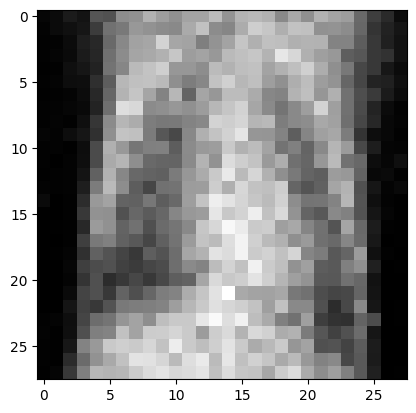

[Epoch 82/100] [Batch 1/163] [D loss: 0.6562] [G loss: 0.7495]
[Epoch 82/100] [Batch 2/163] [D loss: 0.5979] [G loss: 1.1416]
[Epoch 82/100] [Batch 3/163] [D loss: 0.6036] [G loss: 0.8930]
[Epoch 82/100] [Batch 4/163] [D loss: 0.5678] [G loss: 0.8742]
[Epoch 82/100] [Batch 5/163] [D loss: 0.6028] [G loss: 1.0494]
[Epoch 82/100] [Batch 6/163] [D loss: 0.5752] [G loss: 0.8839]
[Epoch 82/100] [Batch 7/163] [D loss: 0.6247] [G loss: 1.0060]
[Epoch 82/100] [Batch 8/163] [D loss: 0.6418] [G loss: 0.6879]
[Epoch 82/100] [Batch 9/163] [D loss: 0.6133] [G loss: 0.9734]
[Epoch 82/100] [Batch 10/163] [D loss: 0.6492] [G loss: 1.0763]
[Epoch 82/100] [Batch 11/163] [D loss: 0.6291] [G loss: 0.8490]
[Epoch 82/100] [Batch 12/163] [D loss: 0.7879] [G loss: 0.6375]
[Epoch 82/100] [Batch 13/163] [D loss: 0.6883] [G loss: 1.0946]
[Epoch 82/100] [Batch 14/163] [D loss: 0.7487] [G loss: 0.7583]
[Epoch 82/100] [Batch 15/163] [D loss: 0.6523] [G loss: 0.8107]
[Epoch 82/100] [Batch 16/163] [D loss: 0.7364] [G

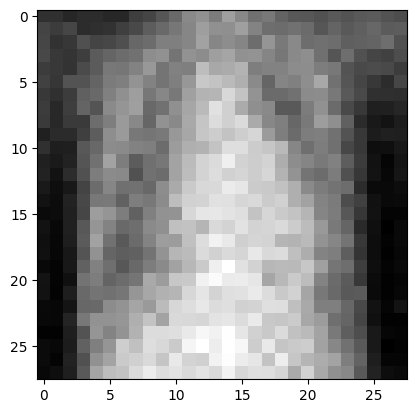

[Epoch 92/100] [Batch 1/163] [D loss: 0.5910] [G loss: 1.0349]
[Epoch 92/100] [Batch 2/163] [D loss: 0.6443] [G loss: 0.7931]
[Epoch 92/100] [Batch 3/163] [D loss: 0.5752] [G loss: 0.9208]
[Epoch 92/100] [Batch 4/163] [D loss: 0.6395] [G loss: 0.7270]
[Epoch 92/100] [Batch 5/163] [D loss: 0.6643] [G loss: 0.9071]
[Epoch 92/100] [Batch 6/163] [D loss: 0.6419] [G loss: 0.7583]
[Epoch 92/100] [Batch 7/163] [D loss: 0.6683] [G loss: 0.8268]
[Epoch 92/100] [Batch 8/163] [D loss: 0.6276] [G loss: 0.9804]
[Epoch 92/100] [Batch 9/163] [D loss: 0.5909] [G loss: 0.8257]
[Epoch 92/100] [Batch 10/163] [D loss: 0.5960] [G loss: 0.8203]
[Epoch 92/100] [Batch 11/163] [D loss: 0.5923] [G loss: 0.9320]
[Epoch 92/100] [Batch 12/163] [D loss: 0.6284] [G loss: 0.6830]
[Epoch 92/100] [Batch 13/163] [D loss: 0.5847] [G loss: 1.0584]
[Epoch 92/100] [Batch 14/163] [D loss: 0.6466] [G loss: 0.9373]
[Epoch 92/100] [Batch 15/163] [D loss: 0.5312] [G loss: 0.8143]
[Epoch 92/100] [Batch 16/163] [D loss: 0.5524] [G

In [6]:
epochs = 100

for epoch in range(epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_imgs = imgs

        # Labels for real and fake images
        valid = torch.ones((real_imgs.size(0), 1), dtype=torch.float32)
        fake = torch.zeros((real_imgs.size(0), 1), dtype=torch.float32)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(real_imgs.size(0), latent_dim)
        gen_imgs = generator(z)
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        print(f"[Epoch {epoch+1}/{epochs}] [Batch {i+1}/{len(train_loader)}] "
              f"[D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")


    # Save images for visualization
    if epoch % 10 == 0:
        with torch.no_grad():
            fake_imgs = generator(z).cpu()
            plt.imshow(fake_imgs[0].squeeze(), cmap="gray")
            plt.show()


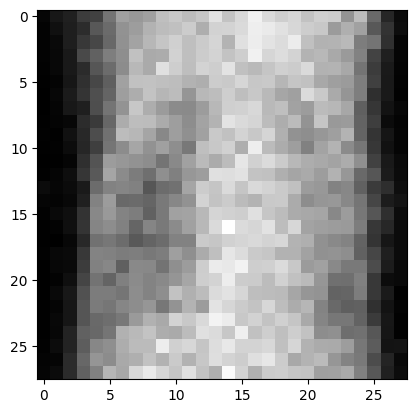

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)

In [7]:
generator.eval()  # Set the generator to evaluation mode
with torch.no_grad():
    for real_imgs, _ in val_loader:
        real_imgs = real_imgs
        z = torch.randn(real_imgs.size(0), latent_dim)
        gen_imgs = generator(z)

        # Display a few generated images
        plt.imshow(gen_imgs[0].cpu().squeeze(), cmap='gray')
        plt.show()

generator.train()  # Set back to training mode


SSIM: 0.296854820279241


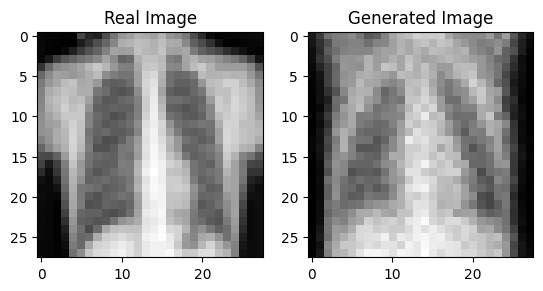

In [9]:
from skimage.metrics import structural_similarity as ssim

generator.eval()
for real_imgs, _ in test_loader:
    real_imgs = real_imgs.to("cpu")
    z = torch.randn(real_imgs.size(0), latent_dim)
    gen_imgs = generator(z)

    # Calculate SSIM for one example
    real_img = real_imgs[0].cpu().numpy().squeeze()
    fake_img = gen_imgs[0].cpu().detach().numpy().squeeze()
    similarity = ssim(real_img, fake_img, data_range=fake_img.max() - fake_img.min())
    print(f"SSIM: {similarity}")

    # Visualize real vs. generated image
    plt.subplot(1, 2, 1)
    plt.title("Real Image")
    plt.imshow(real_img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Generated Image")
    plt.imshow(fake_img, cmap='gray')

    plt.show()
    break
